# Capítulo 01 - O Cenário do Aprendizado de Máquina

In [1]:
# common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

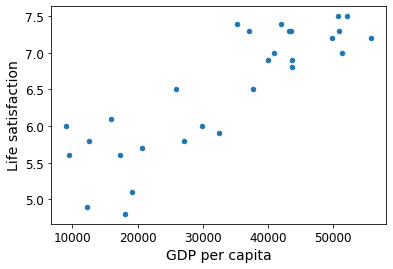

In [4]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [5]:
# Select a linear model
model = LinearRegression()

In [6]:
# Train the model
try:
    model.fit(X, y)
except ValueError:
    model.fit(X, y) # try again (it's work fine)

In [7]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


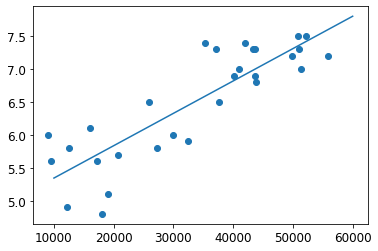

In [8]:
ax_x = np.linspace(10000, 60000)
# visualize the data
plt.scatter(X, y)
# visualize the model graph
plt.plot(np.array(ax_x).reshape(-1, 1), model.predict(np.array(ax_x).reshape(-1, 1)))

In [9]:
import sklearn.neighbors

# select a k-nearest neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

In [10]:
# train the model
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.76666667]]


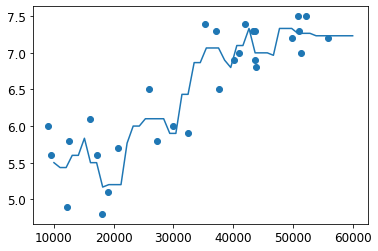

In [12]:
ax_x = np.linspace(10000, 60000)
# visualize the data
plt.scatter(X, y)
# visualize the model graph
plt.plot(np.array(ax_x).reshape(-1, 1), model.predict(np.array(ax_x).reshape(-1, 1)))